# Ejercicio 1: Fluidos pseudoplásticos y dilatantes

## Enunciado

Se tiene una mezcla líquida de dos fluidos desconocidos. Esta mezcla es un fluido no Newtoniano que sigue la **ley de potencia**. Se sabe que la densidad de este fluido es de $\rho=1234.3\hspace{1mm}(kg/m^3)$ y que su viscosidad aparente cerca de la pared de la tubería es $\mu_{a,w}=52\hspace{1mm}(cP)$. Además, se obtuvo experimentalmente un perfil de velocidades de dicho fluido en una tubería.


``````{list-table}
:header-rows: 0
:align: center
:widths: 5 20 30
* -
  - ```{list-table} Resultados experimentales
    :header-rows: 1
    :name: tabla_1
    :align: center
    * - r (m)
      - v (m/s)
    * - 0.10
      - 0.000
    * - 0.09
      - 0.383
    * - 0.08
      - 0.749
    * - 0.07
      - 1.097
    * - 0.06
      - 1.425
    * - 0.05
      - 1.733
    * - 0.04
      - 2.017
    * - 0.03
      - 2.273
    * - 0.02
      - 2.497
    * - 0.01
      - 2.679
    * - 0.00
      - 2.790
    ```
  - ```{figure} ./images/img1_3_1.png
    ---
    name: figura-5
    scale: 40%
    ---

    Perfil de velocidades.
    ```
``````

1. Encuentre el esfuerzo de corte cerca de la pared $t_w$.
2. Mediante un ajuste (Puede usar Excel o python), encuentre los valores de $n$ y $k$ para el fluido y compruebe si es pseudoplástico o dilatante. Ya que usted no sabe el tipo de fluido, asuma inicialmente para su ajuste que $n=1$ y $k=0.1$.
3. Calcule si durante el experimento el flujo era turbulento o laminar.

{ref}`Ver solución <part1:cap3:ex1:sol>`

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

(part1:cap3:ex1:sol)=
## Solución

In [1]:
# Paquetes utilizados
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import handcalcs.render

### Inciso 1

Sabemos que para fluidos no Newtonianos la relación entre esfuerzo de corte $(\tau)$ y tasa de corte $(\dot{\gamma})$ es la siguiente.

$$
\tau = -k\left(\dot{\gamma}\right)^{n}
$$

A esta ecuación se le conoce como la **ley de potencia**. En donde $k$ representa el índice de consistencia y $n$ el índice de la ley de potencia. Sin embargo, al no tener información del fluido, carecemos de los valores para dichos parámetros. En el enunciado, en cambio, nos entregan el valor para la viscosidad aparente.

$$
\mu_a = k\left(\dot{\gamma}\right)^{n-1}
$$

Si unimos esta ecuación con la ley de potencia, y la aplicamos en la pared, se obtiene lo siguiente.

$$
\tau_w = \mu_{a,w}\left(\dot{\gamma}\right) = \mu_{a,w}\left(\frac{dv}{dr}\right)
$$

En la pared la velocidad del fluido es 0. Entonces, de la tabla se pueden elegir el primer y segundo valor para una aproximación de la tasa de corte (*shear rate*). Luego nos queda lo siguiente.

$$
\tau_w = \frac{52}{1000}\left(\frac{0.383-0}{0.01}\right)
$$

Obtenemos que el esfuerzo de corte (*shear stress*) cerca de la pared es aproximadamente $\tau_w=1.9916\hspace{1mm}(Pa)$.

### Inciso 2

Para aquellos fluidos que cumplen con la **ley de potencia**, el perfil de velocidad a lo largo de una tubería puede obtenerse en función del radio.

$$
v = \left(\frac{\tau_w}{k}\right)^{\frac{1}{n}}\frac{nR}{1+n}\left(1-\left(\frac{r}{R}\right)^{\frac{1}{n}+1}\right)
$$

Donde $R$ representa el radio de la tubería y $r$ el radio para un punto específico. Notar que $R=r$ en la pared.

Ya que contamos con datos experimentales, podemos realizar una curva de ajuste que encuentre los parámetros de $n$ y de $k$ que mejor representan al fluido.

C:\Users\igtab\AppData\Local\Temp\ipykernel_25828\1857015476.py:7: RuntimeWarning: invalid value encountered in scalar power
  return (tau_w/k)**(1/n)*(n*R/(1+n))*(1-(r/R)**(1/n+1))


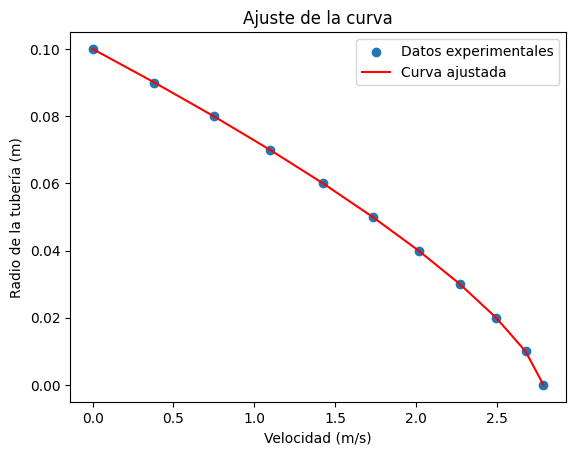

Parámetros ajustados
n: 2.497884
k: 0.000210 (Pa*s^n)


In [2]:
# Definimos nuestra función
def funcion_de_velocidad(r, n, k):
    # Del enunciado y del inciso anterior sabemos:
    R = 0.1
    tau_w = 1.9916
    # Ecuación de perfil de velocidad
    return (tau_w/k)**(1/n)*(n*R/(1+n))*(1-(r/R)**(1/n+1))

# De la tabla recuperamos los datos experimentales
r_exp = np.array([0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0]) #m
v_exp = np.array([0,0.383,0.749,1.097,1.425,1.733,2.017,2.273,2.497,2.679,2.790]) #m/s

# Ajustar los parámetros a los datos experimentares
## Supuesto inicial
parametros_iniciales = [1,0.1]  # (n,k)

## Ajuste
params, covarianza = curve_fit(funcion_de_velocidad, r_exp, v_exp, p0=parametros_iniciales)

## Extraer los parámetros
n_ajus, k_ajus = params

# Análisis de resultados
# Evalua
v_teorica = funcion_de_velocidad(r_exp, n_ajus, k_ajus)

# Gráfico comparativo para evaluar la calidad del ajuste
plt.scatter(v_exp, r_exp, label='Datos experimentales')
plt.plot(v_teorica, r_exp, label='Curva ajustada', color='red')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Radio de la tubería (m)')
plt.title('Ajuste de la curva')
plt.legend()
plt.show()

# Ver los parámetros ajustados
print("Parámetros ajustados")
print("n:", f'{n_ajus:6f}')
print("k:", f'{k_ajus:6f}',"(Pa*s^n)")


Si $n<1$ el fluido es pseudoplástico, por el contrario, si $n>1$ el fluido es dilatante. En este caso $2.498>1$, por lo tanto es dilatante.

### Inciso 3

Para fluidos que cumplen con la ley de potencia tenemos que el número de Reynolds se generaliza en función de la viscosidad aparente. Esta viscosidad aparente no es equivalente a la que nos entrega el enunciado, ya que para Reynolds generalizado, ocupamos la velocidad promedio.

$$
Re' = \frac{\rho\bar{V}D}{\mu_a}
$$

Entonces, $\mu_a$ también se calcula a partir de la velocidad promedio.

$$
\mu_a = k\left(\frac{3n+1}{4n}\right)^n\left(\frac{8\bar{V}}{D}\right)^{n-1}
$$

En donde la velocidad promedio se conoce a través de las propiedades del fluido y el esfuerzo de corte en la pared.

$$
\bar{V} = \frac{nR}{3n+1}\left(\frac{\tau_w}{k}\right)^{\frac{1}{n}}
$$

In [3]:
%%render long
rho = 1234.3 #kg/m3
tau_w = 1.9916 #Pa
R = 0.1 #m
v_prom = (n_ajus*R)/(3*n_ajus+1)*(tau_w/k_ajus)**(1/n_ajus) #m/s
mu_a = k_ajus*((3*n_ajus+1)/(4*n_ajus))**n_ajus*((8*v_prom)/(2*R))**(n_ajus-1) #Pa*s
Re = (rho*v_prom*2*R)/mu_a

<IPython.core.display.Latex object>

Para fluidos no Newtonianos, el flujo es turbulento si se cumple $Re'>2100+875(1-n)$. De lo contrario el flujo es laminar.

Calculamos el límite del intervalo y comparamos.

In [4]:
if Re > 2100+875*(1-n_ajus):
    print("Re' (",f'{Re:6f}',") es mayor que",f'{(2100+875*(1-n_ajus)):6f}',", por lo tanto el flujo es turbulento.")
else:
    print("Re' (",f'{Re:6f}',") es menor que",f'{(2100+875*(1-n_ajus)):6f}',", por lo tanto el flujo es laminar.")

Re' ( 6545.352909 ) es mayor que 789.351492 , por lo tanto el flujo es turbulento.
